In [2]:
import sys
sys.path.insert(0, './..')
import os
import numpy as np
import matplotlib.pyplot as plt
from HopfiledNetwork import *
from utils import *
import json

# load data

In [3]:
path = 'memristor_simulation'
result_path = os.path.join('./results/', path)
if not os.path.exists(result_path):
    os.makedirs(result_path)

num_path = os.path.join('./results/', path, 'numerical')
if not os.path.exists(num_path):
    os.makedirs(num_path)

fig_path = os.path.join('./results/', path, 'fig')
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

model_path = os.path.join('./results/', path, 'models')
if not os.path.exists(model_path):
    os.makedirs(model_path)

In [4]:
from skimage.filters import threshold_mean

def preprocessing(img):
    # Resize image
    # img = resize(img, (w, h), mode='reflect')
    w, h = img.shape

    # Thresholding
    thresh = threshold_mean(img)
    binary = img > thresh
    shift = 2*(binary*1)-1  # Boolian to int

    # Reshape
    flatten = np.reshape(shift, (w*h))
    return flatten


def get_corrupted_input(input, corruption_level):
    corrupted = np.copy(input)
    inv = np.random.binomial(n=1, p=corruption_level, size=len(input))
    for i, v in enumerate(input):
        if inv[i]:
            corrupted[i] = -1 * v
    return corrupted

[[-3.76779451e-03 -2.35646878e-02  0.00000000e+00 ...  1.93002353e-05
   0.00000000e+00 -4.53797647e-04]
 [ 8.01787401e-02 -2.24423016e-02  0.00000000e+00 ...  3.82740235e-04
   3.46870588e-06 -4.58357647e-05]
 [ 3.36502714e-02  9.54984314e-04  0.00000000e+00 ... -6.67614541e-03
   7.08861176e-05 -7.01281898e-03]
 ...
 [ 1.13574588e-04  2.19790701e-02  0.00000000e+00 ... -3.61805929e-03
   0.00000000e+00  5.92871987e-01]
 [ 8.93167059e-05  7.42058418e-01  0.00000000e+00 ...  5.10156863e-04
   0.00000000e+00  3.29345462e-02]
 [ 0.00000000e+00  1.71037354e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -9.63447686e-03]]
(10000,)
(64, 10000)
[7 2 1 ... 4 5 6]


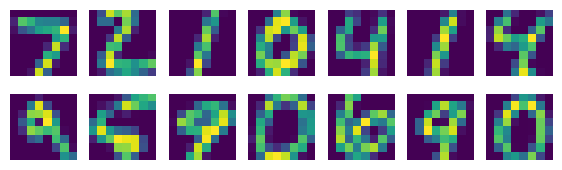

[0 0 0 ... 9 9 9]


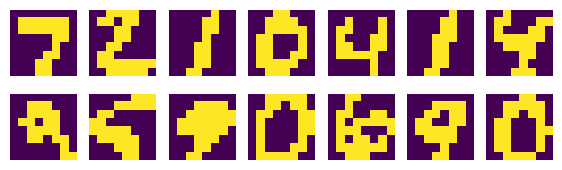

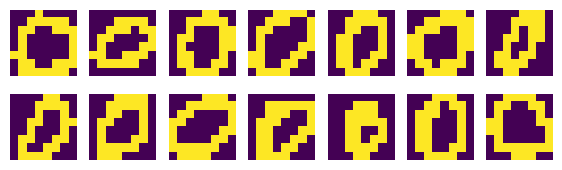

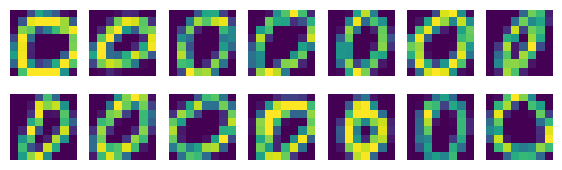

In [5]:
import scipy.io

# 用loadmat函数加载.mat文件
mat_data = scipy.io.loadmat('../data/mnist_test_8x8.mat')
print(mat_data['data'])
mnist_data = mat_data['data']
mnist_label=mat_data['labels'].flatten()
print(mnist_label.shape)


new_mnist_data=[]
print(mnist_data.shape)
print(mnist_label)
for i in range(len(mnist_data[1])):
    mid_data=mnist_data[:,i].reshape(8,8).T
    mid_data=mid_data.flatten()
    new_mnist_data.append(mid_data)
new_mnist_data=np.array(new_mnist_data)
new_mnist_data=2*np.clip(new_mnist_data,0,1)-1



plt.figure(figsize=(7, 2))
for i in range(14):
    plt.subplot(2, 7, i+1)
    plt.imshow(new_mnist_data[i].reshape(8, 8))
    plt.axis('off')
plt.show()

new_mnist_data_binary=[]
for i in range(len(new_mnist_data)):
    mid_data=new_mnist_data[i] 
    mid_data= preprocessing(mid_data.reshape(8,8))
    new_mnist_data_binary.append(mid_data)
new_mnist_data_binary=np.array(new_mnist_data_binary)

sorting_indices = np.argsort(mnist_label)
sorted_mnist_data = new_mnist_data[sorting_indices]
print(mnist_label[sorting_indices])

new_mnist_data_binary_order=[]
for i in range(len(sorted_mnist_data)):
    mid_data=sorted_mnist_data[i]
    mid_data= preprocessing(mid_data.reshape(8,8))
    new_mnist_data_binary_order.append(mid_data)
new_mnist_data_binary_order=np.array(new_mnist_data_binary_order)

new_mnist_data_order=[]
for i in range(len(sorted_mnist_data)):
    mid_data=sorted_mnist_data[i]
    mid_data=mid_data.flatten()
    new_mnist_data_order.append(mid_data)
new_mnist_data_order=np.array(new_mnist_data_order)


plt.figure(figsize=(7, 2))
for i in range(14):
    plt.subplot(2, 7, i+1)
    plt.imshow(new_mnist_data_binary[i].reshape(8, 8))
    plt.axis('off')
plt.show()

plt.figure(figsize=(7, 2))
for i in range(14):
    plt.subplot(2, 7, i+1)
    plt.imshow(new_mnist_data_binary_order[i].reshape(8, 8))
    plt.axis('off')
plt.show()

plt.figure(figsize=(7, 2))
for i in range(14):
    plt.subplot(2, 7, i+1)
    plt.imshow(new_mnist_data_order[i].reshape(8, 8))
    plt.axis('off')
plt.show()

In [6]:
# load the stored patterns
n_patterns=10
stored_data_list=torch.from_numpy(new_mnist_data_binary).float()
# stored_data_list=torch.from_numpy(digital_letter_data).float()
stored_data=stored_data_list[0:n_patterns]
print(stored_data.shape)

torch.Size([10, 64])


In [7]:
# ordered patterns
n=405
num_samples = 10
stored_data_list=torch.from_numpy(new_mnist_data_binary_order).float()
stored_data = stored_data_list[n::1000]
print(stored_data.shape)

torch.Size([10, 64])


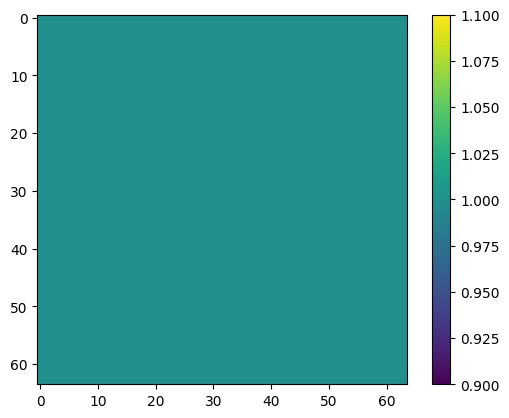

pattern shape torch.Size([1, 64])
iteration= 99
Epoch [1/200], Epoch_Loss: 3.613446764028083e-10
pattern shape torch.Size([3, 64])
iteration= 99
Epoch [199/200], Epoch_Loss: 6.101810280749001e-06
pattern shape torch.Size([5, 64])
iteration= 99
Epoch [199/200], Epoch_Loss: 4.880642268290103e-06
pattern shape torch.Size([7, 64])
iteration= 99
Epoch [199/200], Epoch_Loss: 1.3972850508382962e-06
pattern shape torch.Size([9, 64])
iteration= 99
Epoch [199/200], Epoch_Loss: 3.63131173723256e-07
pattern shape torch.Size([11, 64])
iteration= 99
Epoch [196/200], Epoch_Loss: 9.643476320516957e-08
pattern shape torch.Size([13, 64])
iteration= 99
Epoch [175/200], Epoch_Loss: 9.63081069252999e-08
pattern shape torch.Size([15, 64])
iteration= 99
Epoch [199/200], Epoch_Loss: 3.4968467807298493e-07
pattern shape torch.Size([17, 64])
iteration= 99
Epoch [199/200], Epoch_Loss: 0.0036764880769409674
pattern shape torch.Size([19, 64])
iteration= 99
Epoch [199/200], Epoch_Loss: 2.35753595475972e-07
pattern 

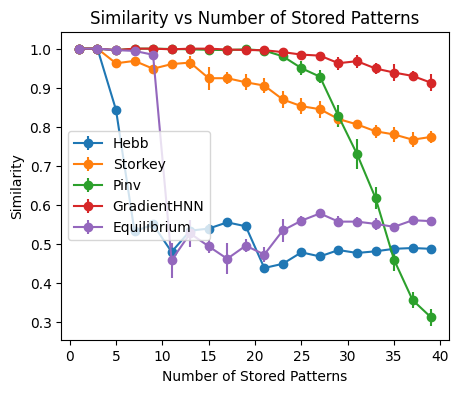

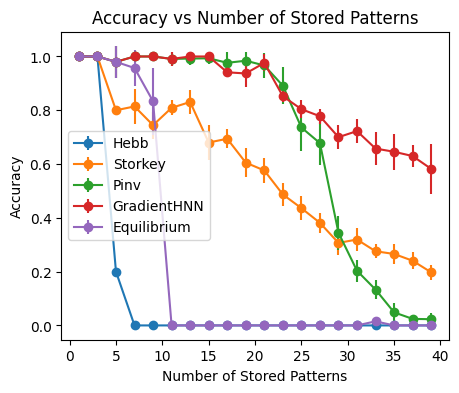

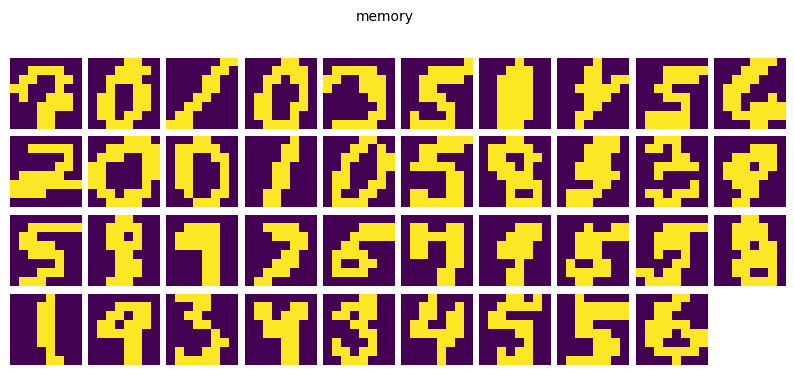

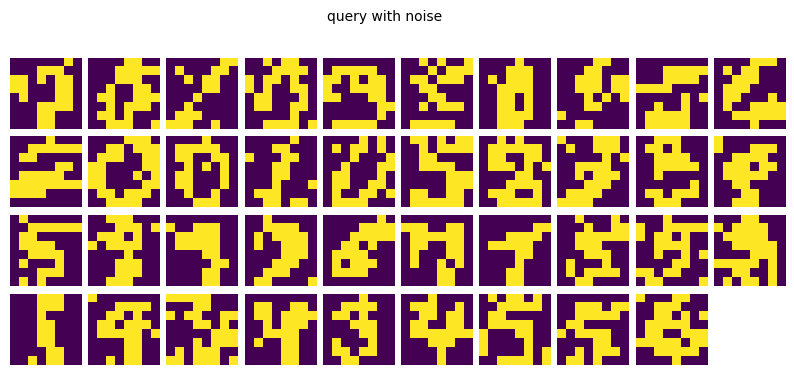

<Figure size 640x480 with 0 Axes>

In [10]:
# calculate accuracy
device='cuda'
input_size=stored_data.shape[1]
learn_lr=0.01
learn_iters=200
distance_type='cos'
params={
    'input_size':input_size,
    'learn_lr':learn_lr,
    'learn_iters':learn_iters,
    'device':device,
    'recall_iters':100,
    'data_type':'binary',
    'mid_state':False,
}



#plot settings
plot_weight_flag=True

#memristor variation and stuck at fault
num_simulations_accuracy=10
num_pattern_list=np.arange(1,40,2)
stuck_at_fault_rate=0.0
mem_var=0.0
weight_decay=0.0

mem_stuck_mask=torch.ones(input_size,input_size)
plt.imshow(mem_stuck_mask)
plt.colorbar()
plt.show()


Hebb_similarity_list=[]
Storkey_similarity_list=[]
Pinv_similarity_list=[]
HNN_similarity_list=[]
Equilibrium_similarity_list=[]

for num_pattern in num_pattern_list:
    seed=1
    torch.manual_seed(seed)
    # 生成随机排列的索引
    random_indices = torch.randperm(stored_data_list.size(0))[:num_pattern]
    # 使用随机索引选择数据
    stored_data = stored_data_list[random_indices]

    # create the network
    hnn=SingleLayerHNN_lambda(input_size=input_size)
    Hebb = HopfieldNet(num_neurons=input_size)
    Storkey = HopfieldNet(num_neurons=input_size)
    Pinv=HopfieldNet(num_neurons=input_size)
    Equilibrium=HopfieldNet(num_neurons=input_size)

    # train the network
    Hebb.learn_patterns(stored_data, rule='Hebb',options={})
    Storkey.learn_patterns(stored_data, rule='Storkey',options={})     
    Pinv.learn_patterns(stored_data, rule='Pinv',options={})
    Equilibrium.learn_patterns(stored_data, rule='Equilibrium',options={})
    optimizer_hnn = torch.optim.RMSprop(hnn.parameters(), lr=learn_lr,weight_decay=weight_decay)
    hnn.set_mask(mask=mem_stuck_mask)
    hnn_losses=train_multilayer_hnn(hnn, optimizer_hnn, stored_data, learn_iters, device)


    hnn.add_variation(var=mem_var)
    Hebb.add_weight_variation(variation=mem_var)
    Storkey.add_weight_variation(variation=mem_var)
    Pinv.add_weight_variation(variation=mem_var)
    Equilibrium.add_weight_variation(variation=mem_var)

    Hebb.add_mask(mask=mem_stuck_mask)
    Storkey.add_mask(mask=mem_stuck_mask)
    Pinv.add_mask(mask=mem_stuck_mask)
    Equilibrium.add_mask(mask=mem_stuck_mask)

    for _ in range(num_simulations_accuracy):
        #corrupt the data
        params['recall_iters']=100
        test_data=np.array([get_corrupted_input(d,0.1) for d in stored_data])
        test_data = torch.from_numpy(test_data).float()

        # recall data
        HNN_recall = singlelayer_recall(hnn, test_data, params)
        Hebb_recall=Hebb.retrieve_pattern(test_data, sync=True,chnn=False)
        Storkey_recall=Storkey.retrieve_pattern(test_data, sync=True,chnn=False)
        Pinv_recall=Pinv.retrieve_pattern(test_data, sync=True,chnn=False)
        Equilibrium_recall=Equilibrium.retrieve_pattern(test_data, sync=True,chnn=False)


        # calculate similarity
        Hebb_similarity=torch.mean(calculate_sim(stored_data,Hebb_recall,distance_type=distance_type))
        Storkey_similarity=torch.mean(calculate_sim(stored_data,Storkey_recall,distance_type=distance_type))
        Pinv_similarity=torch.mean(calculate_sim(stored_data,Pinv_recall,distance_type=distance_type))
        HNN_similarity=torch.mean(calculate_sim(stored_data,HNN_recall,distance_type=distance_type))
        Equilibrium_similarity=torch.mean(calculate_sim(stored_data,Equilibrium_recall,distance_type=distance_type))

        Hebb_accuracy=torch.sum(torch.eq((calculate_sim(stored_data,Hebb_recall,distance_type='hamming')),0)).item()/num_pattern
        Storkey_accuracy=torch.sum(torch.eq((calculate_sim(stored_data,Storkey_recall,distance_type='hamming')),0)).item()/num_pattern
        Pinv_accuracy=torch.sum(torch.eq((calculate_sim(stored_data,Pinv_recall,distance_type='hamming')),0)).item()/num_pattern
        HNN_accuracy=torch.sum(torch.eq((calculate_sim(stored_data,HNN_recall,distance_type='hamming')),0)).item()/num_pattern
        Equilibrium_accuracy=torch.sum(torch.eq((calculate_sim(stored_data,Equilibrium_recall,distance_type='hamming')),0)).item()/num_pattern

        Hebb_similarity_list.append(to_np(Hebb_similarity))
        Storkey_similarity_list.append(to_np(Storkey_similarity))
        Pinv_similarity_list.append(to_np(Pinv_similarity))
        HNN_similarity_list.append(to_np(HNN_similarity))
        Equilibrium_similarity_list.append(to_np(Equilibrium_similarity))

input_similarities=torch.mean(calculate_sim(stored_data,test_data,distance_type=distance_type))
Hebb_similarity_list=np.array(Hebb_similarity_list).reshape(-1,num_simulations_accuracy)
Storkey_similarity_list=np.array(Storkey_similarity_list).reshape(-1,num_simulations_accuracy)
Pinv_similarity_list=np.array(Pinv_similarity_list).reshape(-1,num_simulations_accuracy)
HNN_similarity_list=np.array(HNN_similarity_list).reshape(-1,num_simulations_accuracy)
Equilibrium_similarity_list=np.array(Equilibrium_similarity_list).reshape(-1,num_simulations_accuracy)


np.savez(num_path+'/AssociateMemory.npz',num_pattern_list=num_pattern_list,Hebb_similarity_list=Hebb_similarity_list,Storkey_similarity_list=Storkey_similarity_list,Pinv_similarity_list=Pinv_similarity_list,HNN_similarity_list=HNN_similarity_list,Equilibrium_similarity_list=Equilibrium_similarity_list,input_similarities=input_similarities)

plt.figure(figsize=(5,4))
plt.errorbar(num_pattern_list,np.mean(Hebb_similarity_list,axis=1),yerr=np.std(Hebb_similarity_list,axis=1),label='Hebb',marker='o')
plt.errorbar(num_pattern_list,np.mean(Storkey_similarity_list,axis=1),yerr=np.std(Storkey_similarity_list,axis=1),label='Storkey',marker='o')
plt.errorbar(num_pattern_list,np.mean(Pinv_similarity_list,axis=1),yerr=np.std(Pinv_similarity_list,axis=1),label='Pinv',marker='o')
plt.errorbar(num_pattern_list,np.mean(HNN_similarity_list,axis=1),yerr=np.std(HNN_similarity_list,axis=1),label='GradientHNN',marker='o')
plt.errorbar(num_pattern_list,np.mean(Equilibrium_similarity_list,axis=1),yerr=np.std(Equilibrium_similarity_list,axis=1),label='Equilibrium',marker='o')
plt.xlabel('Number of Stored Patterns')
plt.ylabel('Similarity')
plt.title('Similarity vs Number of Stored Patterns')
plt.legend()
plt.show()


# plot setting
params['plot_num_per_row'] = 12
params['data_set'] = 'mnist'
params['repeat'] = 10
params['plot_num_per_row'] = 10
params['recall_iters']=100
params['mid_state']=False

plot_memory(stored_data, 1, fig_path, params)
plot_memory_noise(test_data, 1, fig_path, params)

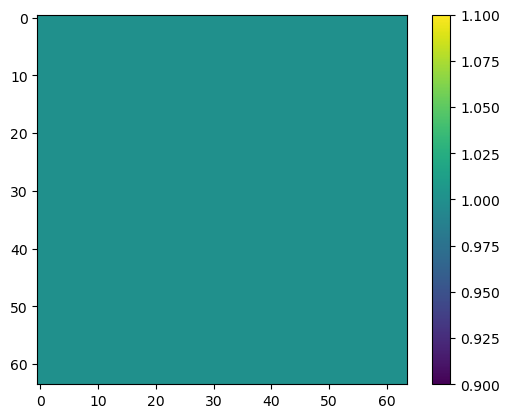

pattern shape torch.Size([1, 64])
iteration= 99
Epoch [1/2000], Loss: 8.2251155886226e-10
Epoch [1/2000], Loss: 8.2251155886226e-10
pattern shape torch.Size([1, 64])
iteration= 99
Epoch [1/2000], Loss: 2.020700273774878e-10
Epoch [1/2000], Loss: 2.020700273774878e-10
pattern shape torch.Size([1, 64])
iteration= 99
Epoch [1/2000], Loss: 3.6745817499905797e-10
Epoch [1/2000], Loss: 3.6745817499905797e-10
pattern shape torch.Size([1, 64])
iteration= 99
Epoch [1/2000], Loss: 4.5949316573867804e-10
Epoch [1/2000], Loss: 4.5949316573867804e-10
pattern shape torch.Size([1, 64])
iteration= 99
Epoch [1/2000], Loss: 5.761777166490845e-10
Epoch [1/2000], Loss: 5.761777166490845e-10
pattern shape torch.Size([1, 64])
iteration= 99
Epoch [1/2000], Loss: 1.785061543024824e-10
Epoch [1/2000], Loss: 1.785061543024824e-10


pattern shape torch.Size([1, 64])
iteration= 99
Epoch [1/2000], Loss: 2.3454427289237856e-10
Epoch [1/2000], Loss: 2.3454427289237856e-10
pattern shape torch.Size([1, 64])
iteration= 99
Epoch [1/2000], Loss: 2.1054480381366147e-10
Epoch [1/2000], Loss: 2.1054480381366147e-10
pattern shape torch.Size([1, 64])
iteration= 99
Epoch [1/2000], Loss: 7.839228155503974e-10
Epoch [1/2000], Loss: 7.839228155503974e-10
pattern shape torch.Size([1, 64])
iteration= 99
Epoch [1/2000], Loss: 1.589816056579707e-10
Epoch [1/2000], Loss: 1.589816056579707e-10
pattern shape torch.Size([3, 64])
iteration= 99
Epoch [1964/2000], Loss: 9.976530712663134e-09
Epoch [1964/2000], Loss: 9.976530712663134e-09
pattern shape torch.Size([3, 64])
iteration= 99
Epoch [1954/2000], Loss: 9.96540716613481e-09
Epoch [1954/2000], Loss: 9.96540716613481e-09
pattern shape torch.Size([3, 64])
iteration= 99
Epoch [1972/2000], Loss: 9.990178462260246e-09
Epoch [1972/2000], Loss: 9.990178462260246e-09
pattern shape torch.Size([3,

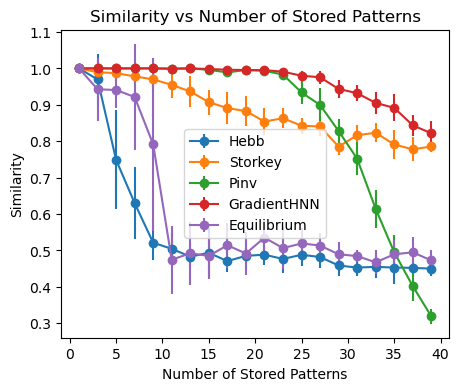

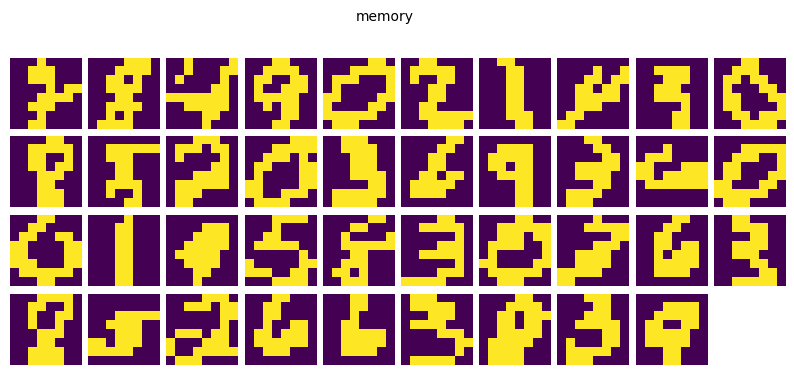

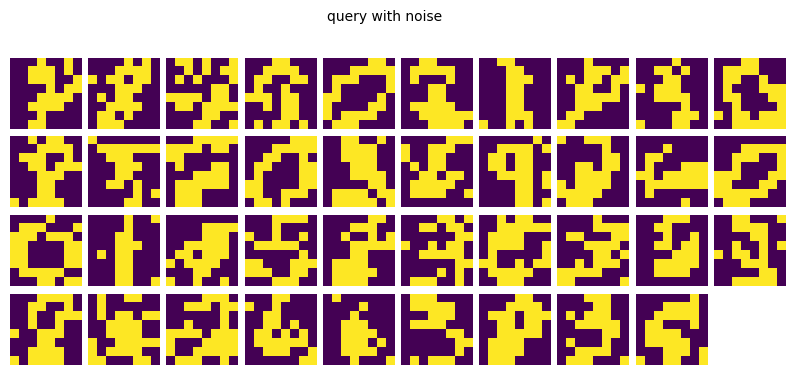

<Figure size 640x480 with 0 Axes>

In [9]:
# calculate accuracy
device='cuda'
input_size=stored_data.shape[1]
learn_lr=0.01
learn_iters=2000
distance_type='cos'
params={
    'input_size':input_size,
    'learn_lr':learn_lr,
    'learn_iters':learn_iters,
    'device':device,
    'recall_iters':100,
    'data_type':'binary',
    'mid_state':False,
}



#plot settings
plot_weight_flag=True

#memristor variation and stuck at fault
num_simulations_accuracy=10
num_pattern_list=np.arange(1,40,2)
stuck_at_fault_rate=0.0
mem_var=0.0
weight_decay=0.0

mem_stuck_mask=torch.ones(input_size,input_size)
plt.imshow(mem_stuck_mask)
plt.colorbar()
plt.show()


Hebb_similarity_list=[]
Storkey_similarity_list=[]
Pinv_similarity_list=[]
HNN_similarity_list=[]
Equilibrium_similarity_list=[]

for num_pattern in num_pattern_list:
    for _ in range(num_simulations_accuracy):
        # 生成随机排列的索引
        random_indices = torch.randperm(stored_data_list.size(0))[:num_pattern]
        # 使用随机索引选择数据
        stored_data = stored_data_list[random_indices]

        # create the network
        hnn=SingleLayerHNN_lambda(input_size=input_size)
        Hebb = HopfieldNet(num_neurons=input_size)
        Storkey = HopfieldNet(num_neurons=input_size)
        Pinv=HopfieldNet(num_neurons=input_size)
        Equilibrium=HopfieldNet(num_neurons=input_size)

        # train the network
        Hebb.learn_patterns(stored_data, rule='Hebb',options={})
        Storkey.learn_patterns(stored_data, rule='Storkey',options={})     
        Pinv.learn_patterns(stored_data, rule='Pinv',options={})
        Equilibrium.learn_patterns(stored_data, rule='Equilibrium',options={})
        optimizer_hnn = torch.optim.RMSprop(hnn.parameters(), lr=learn_lr,weight_decay=weight_decay)
        hnn.set_mask(mask=mem_stuck_mask)
        hnn_losses=train_multilayer_batch(hnn, optimizer_hnn, stored_data, learn_iters, device)


        hnn.add_variation(var=mem_var)
        Hebb.add_weight_variation(variation=mem_var)
        Storkey.add_weight_variation(variation=mem_var)
        Pinv.add_weight_variation(variation=mem_var)
        Equilibrium.add_weight_variation(variation=mem_var)

        Hebb.add_mask(mask=mem_stuck_mask)
        Storkey.add_mask(mask=mem_stuck_mask)
        Pinv.add_mask(mask=mem_stuck_mask)
        Equilibrium.add_mask(mask=mem_stuck_mask)


        #corrupt the data
        params['recall_iters']=100
        test_data=np.array([get_corrupted_input(d,0.1) for d in stored_data])
        test_data = torch.from_numpy(test_data).float()

        # recall data
        HNN_recall = singlelayer_recall(hnn, test_data, params)
        Hebb_recall=Hebb.retrieve_pattern(test_data, sync=True,chnn=False)
        Storkey_recall=Storkey.retrieve_pattern(test_data, sync=True,chnn=False)
        Pinv_recall=Pinv.retrieve_pattern(test_data, sync=True,chnn=False)
        Equilibrium_recall=Equilibrium.retrieve_pattern(test_data, sync=True,chnn=False)


        # calculate similarity
        Hebb_similarity=torch.mean(calculate_sim(stored_data,Hebb_recall,distance_type=distance_type))
        Storkey_similarity=torch.mean(calculate_sim(stored_data,Storkey_recall,distance_type=distance_type))
        Pinv_similarity=torch.mean(calculate_sim(stored_data,Pinv_recall,distance_type=distance_type))
        HNN_similarity=torch.mean(calculate_sim(stored_data,HNN_recall,distance_type=distance_type))
        Equilibrium_similarity=torch.mean(calculate_sim(stored_data,Equilibrium_recall,distance_type=distance_type))

        Hebb_accuracy=torch.sum(torch.eq((calculate_sim(stored_data,Hebb_recall,distance_type='hamming')),0)).item()/num_pattern
        Storkey_accuracy=torch.sum(torch.eq((calculate_sim(stored_data,Storkey_recall,distance_type='hamming')),0)).item()/num_pattern
        Pinv_accuracy=torch.sum(torch.eq((calculate_sim(stored_data,Pinv_recall,distance_type='hamming')),0)).item()/num_pattern
        HNN_accuracy=torch.sum(torch.eq((calculate_sim(stored_data,HNN_recall,distance_type='hamming')),0)).item()/num_pattern
        Equilibrium_accuracy=torch.sum(torch.eq((calculate_sim(stored_data,Equilibrium_recall,distance_type='hamming')),0)).item()/num_pattern

        Hebb_similarity_list.append(to_np(Hebb_similarity))
        Storkey_similarity_list.append(to_np(Storkey_similarity))
        Pinv_similarity_list.append(to_np(Pinv_similarity))
        HNN_similarity_list.append(to_np(HNN_similarity))
        Equilibrium_similarity_list.append(to_np(Equilibrium_similarity))

input_similarities=torch.mean(calculate_sim(stored_data,test_data,distance_type=distance_type))
Hebb_similarity_list=np.array(Hebb_similarity_list).reshape(-1,num_simulations_accuracy)
Storkey_similarity_list=np.array(Storkey_similarity_list).reshape(-1,num_simulations_accuracy)
Pinv_similarity_list=np.array(Pinv_similarity_list).reshape(-1,num_simulations_accuracy)
HNN_similarity_list=np.array(HNN_similarity_list).reshape(-1,num_simulations_accuracy)
Equilibrium_similarity_list=np.array(Equilibrium_similarity_list).reshape(-1,num_simulations_accuracy)


np.savez(num_path+'/AssociateMemory_simulation.npz',num_pattern_list=num_pattern_list,Hebb_similarity_list=Hebb_similarity_list,Storkey_similarity_list=Storkey_similarity_list,Pinv_similarity_list=Pinv_similarity_list,HNN_similarity_list=HNN_similarity_list,Equilibrium_similarity_list=Equilibrium_similarity_list,input_similarities=input_similarities)

plt.figure(figsize=(5,4))
plt.errorbar(num_pattern_list,np.mean(Hebb_similarity_list,axis=1),yerr=np.std(Hebb_similarity_list,axis=1),label='Hebb',marker='o')
plt.errorbar(num_pattern_list,np.mean(Storkey_similarity_list,axis=1),yerr=np.std(Storkey_similarity_list,axis=1),label='Storkey',marker='o')
plt.errorbar(num_pattern_list,np.mean(Pinv_similarity_list,axis=1),yerr=np.std(Pinv_similarity_list,axis=1),label='Pinv',marker='o')
plt.errorbar(num_pattern_list,np.mean(HNN_similarity_list,axis=1),yerr=np.std(HNN_similarity_list,axis=1),label='GradientHNN',marker='o')
plt.errorbar(num_pattern_list,np.mean(Equilibrium_similarity_list,axis=1),yerr=np.std(Equilibrium_similarity_list,axis=1),label='Equilibrium',marker='o')
plt.xlabel('Number of Stored Patterns')
plt.ylabel('Similarity')
plt.title('Similarity vs Number of Stored Patterns')
plt.legend()
plt.show()


# plot setting
params['plot_num_per_row'] = 12
params['data_set'] = 'mnist'
params['repeat'] = 10
params['plot_num_per_row'] = 10
params['recall_iters']=100
params['mid_state']=False

plot_memory(stored_data, 1, fig_path, params)
plot_memory_noise(test_data, 1, fig_path, params)

In [11]:
# load the stored patterns
num_pattern=20
stored_data=torch.from_numpy(new_mnist_data_binary[0:num_pattern]).float()

In [6]:
# ordered patterns
n=405
num_samples = 10
stored_data_list=torch.from_numpy(new_mnist_data_binary_order).float()
stored_data = stored_data_list[n::1000]
print(stored_data.shape)

torch.Size([10, 64])


pattern shape torch.Size([10, 64])
iteration= 99
Epoch [3312/10000], Loss: 9.992499272470923e-09
Epoch [3312/10000], Loss: 9.992499272470923e-09
<class 'torch.Tensor'>
pattern shape torch.Size([10, 64])
iteration= 99
Epoch [3397/10000], Loss: 9.997694228047749e-09
Epoch [3397/10000], Loss: 9.997694228047749e-09
<class 'torch.Tensor'>
pattern shape torch.Size([10, 64])
iteration= 99
Epoch [3438/10000], Loss: 9.98939686525091e-09
Epoch [3438/10000], Loss: 9.98939686525091e-09
<class 'torch.Tensor'>
pattern shape torch.Size([10, 64])
iteration= 99
Epoch [3512/10000], Loss: 9.993643246275496e-09
Epoch [3512/10000], Loss: 9.993643246275496e-09
<class 'torch.Tensor'>
pattern shape torch.Size([10, 64])
iteration= 99
Epoch [3613/10000], Loss: 9.999779670977205e-09
Epoch [3613/10000], Loss: 9.999779670977205e-09
<class 'torch.Tensor'>
pattern shape torch.Size([10, 64])
iteration= 99
Epoch [3749/10000], Loss: 9.992098704003638e-09
Epoch [3749/10000], Loss: 9.992098704003638e-09
<class 'torch.Ten

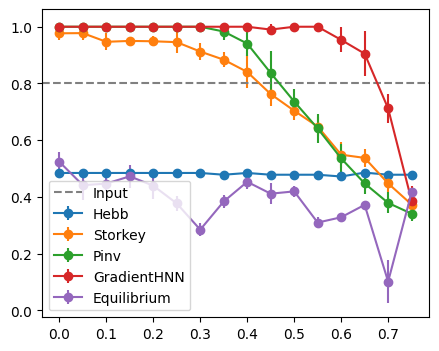

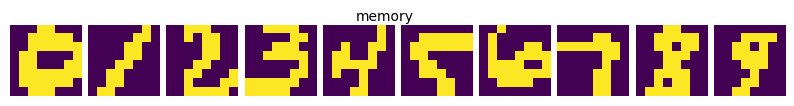

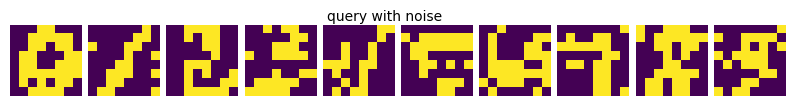

<Figure size 640x480 with 0 Axes>

In [9]:
device='cpu'
input_size=stored_data.shape[1]
learn_lr=1e-3
learn_iters=10000
distance_type='cos'
params={
    'input_size':input_size,
    'learn_lr':learn_lr,
    'learn_iters':learn_iters,
    'device':device,
    'recall_iters':100,
    'data_type':'binary',
    'plot_num_per_row':10,
    'data_set':'mnist',
    'repeat':0,
}

#plot settings
plot_weight_flag=True
num_simulations=5
#memristor variation and stuck at fault
mem_var=0.0
stuck_at_fault_list=np.arange(0,0.8,0.05)



Hebb_similarity_list=[]
Storkey_similarity_list=[]
Pinv_similarity_list=[]
HNN_similarity_list=[]
Equilibrium_similarity_list=[]

input_similarities_list=[]

for i in range (num_simulations):
    for stuck_at_fault_rate in stuck_at_fault_list:
        # create the network
        hnn=SingleLayerHNN_lambda(input_size=input_size)
        Hebb = HopfieldNet(num_neurons=input_size)
        Storkey = HopfieldNet(num_neurons=input_size)
        Pinv=HopfieldNet(num_neurons=input_size)
        Equilibrium=HopfieldNet(num_neurons=input_size)

        # train the network
        Hebb.learn_patterns(stored_data, rule='Hebb',options={})
        Storkey.learn_patterns(stored_data, rule='Storkey',options={})     
        Pinv.learn_patterns(stored_data, rule='Pinv',options={})
        Equilibrium.learn_patterns(stored_data, rule='Equilibrium',options={})


        optimizer_hnn = torch.optim.RMSprop(hnn.parameters(), lr=learn_lr)
        mem_stuck_mask=generate_mask(input_size,stuck_at_fault_rate,seed=1)
        hnn.set_mask(mask=mem_stuck_mask)
        hnn.noise_level=mem_var*4
        hnn_losses=train_multilayer_batch(hnn, optimizer_hnn, stored_data, learn_iters, device)

        hnn.add_variation(var=mem_var)
        Hebb.add_weight_variation(variation=mem_var)
        Storkey.add_weight_variation(variation=mem_var)
        Pinv.add_weight_variation(variation=mem_var)
        Equilibrium.add_weight_variation(variation=mem_var)

        Hebb.add_mask(mask=mem_stuck_mask)
        Storkey.add_mask(mask=mem_stuck_mask)
        Pinv.add_mask(mask=mem_stuck_mask)
        Equilibrium.add_mask(mask=mem_stuck_mask)

        # recall setting
        params['recall_iters']=100
        test_data=np.array([get_corrupted_input(d,0.1) for d in stored_data])
        test_data = torch.from_numpy(test_data).float()

        # recall data
        HNN_recall = singlelayer_recall(hnn, test_data, params)
        Hebb_recall=Hebb.retrieve_pattern(test_data, sync=True,chnn=False)
        Storkey_recall=Storkey.retrieve_pattern(test_data, sync=True,chnn=False)
        Pinv_recall=Pinv.retrieve_pattern(test_data, sync=True,chnn=False)
        Equilibrium_recall=Equilibrium.retrieve_pattern(test_data, sync=True,chnn=False)


        print(type(stored_data))
        # calculate similarity
        Hebb_similarity=torch.mean(calculate_sim(stored_data,Hebb_recall,distance_type=distance_type))
        Storkey_similarity=torch.mean(calculate_sim(stored_data,Storkey_recall,distance_type=distance_type))
        Pinv_similarity=torch.mean(calculate_sim(stored_data,Pinv_recall,distance_type=distance_type))
        HNN_similarity=torch.mean(calculate_sim(stored_data,HNN_recall,distance_type=distance_type))
        Equilibrium_similarity=torch.mean(calculate_sim(stored_data,Equilibrium_recall,distance_type=distance_type))

        Hebb_similarity_list.append(to_np(Hebb_similarity).item())
        Storkey_similarity_list.append(to_np(Storkey_similarity).item())
        Pinv_similarity_list.append(to_np(Pinv_similarity).item())
        HNN_similarity_list.append(to_np(HNN_similarity).item())
        Equilibrium_similarity_list.append(to_np(Equilibrium_similarity).item())

        input_similarities_list.append(to_np(torch.mean(calculate_sim(stored_data,test_data,distance_type=distance_type))).item())
input_similarities=np.mean(input_similarities_list)
results={}
results['Hebb_similarity_list']=Hebb_similarity_list
results['Storkey_similarity_list']=Storkey_similarity_list
results['Pinv_similarity_list']=Pinv_similarity_list
results['HNN_similarity_list']=HNN_similarity_list
results['Equilibrium_similarity_list']=Equilibrium_similarity_list

results['stuck_at_fault_list']=stuck_at_fault_list.tolist()
results['mem_var']=mem_var
results['input_similarities']=input_similarities.item()

np.savez(num_path+'/AssociateMemory_stuck_at_fault_20241220.npz',mem_var=mem_var,stuck_at_fault_list=stuck_at_fault_list,Hebb_similarity_list=Hebb_similarity_list,Storkey_similarity_list=Storkey_similarity_list,Pinv_similarity_list=Pinv_similarity_list,HNN_similarity_list=HNN_similarity_list,Equilibrium_similarity_list=Equilibrium_similarity_list,input_similarities=input_similarities)
Hebb_similarity_list=np.array(Hebb_similarity_list).reshape(num_simulations,-1)
Storkey_similarity_list=np.array(Storkey_similarity_list).reshape(num_simulations,-1)
Pinv_similarity_list=np.array(Pinv_similarity_list).reshape(num_simulations,-1)
HNN_similarity_list=np.array(HNN_similarity_list).reshape(num_simulations,-1)
Equilibrium_similarity_list=np.array(Equilibrium_similarity_list).reshape(num_simulations,-1)



plt.figure(figsize=(5,4))
plt.errorbar(stuck_at_fault_list,np.mean(Hebb_similarity_list,axis=0),yerr=np.std(Hebb_similarity_list,axis=0),label='Hebb',marker='o')
plt.errorbar(stuck_at_fault_list,np.mean(Storkey_similarity_list,axis=0),yerr=np.std(Storkey_similarity_list,axis=0),label='Storkey',marker='o')
plt.errorbar(stuck_at_fault_list,np.mean(Pinv_similarity_list,axis=0),yerr=np.std(Pinv_similarity_list,axis=0),label='Pinv',marker='o')
plt.errorbar(stuck_at_fault_list,np.mean(HNN_similarity_list,axis=0),yerr=np.std(HNN_similarity_list,axis=0),label='GradientHNN',marker='o')
plt.errorbar(stuck_at_fault_list,np.mean(Equilibrium_similarity_list,axis=0),yerr=np.std(Equilibrium_similarity_list,axis=0),label='Equilibrium',marker='o')
plt.axhline(y=input_similarities,label='Input',linestyle='--',color='gray')
plt.legend()

plot_memory(stored_data, 1, fig_path, params)
plot_memory_noise(test_data, 1, fig_path, params)

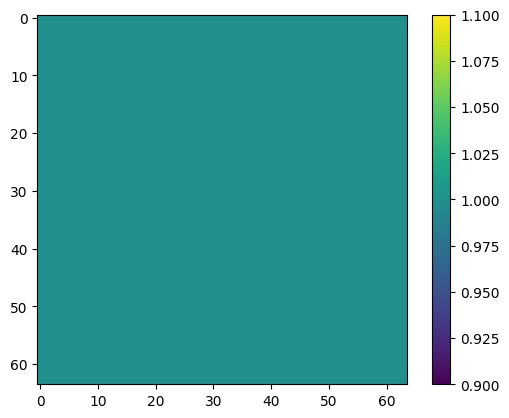

pattern shape torch.Size([10, 64])
iteration= 99


KeyboardInterrupt: 

In [7]:
device='cuda'
input_size=stored_data.shape[1]
learn_lr=1e-3
learn_iters=10000
distance_type='cos'
params={
    'input_size':input_size,
    'learn_lr':learn_lr,
    'learn_iters':learn_iters,
    'device':device,
    'recall_iters':100,
    'data_type':'binary',
    'mid_state':False,
}

#plot settings
plot_weight_flag=True

#memristor variation and stuck at fault
num_simulations=20
mem_var_list=np.arange(0,0.40,0.02)
stuck_at_fault_rate=0.0

mem_stuck_mask=torch.ones(input_size,input_size)
# mem_stuck_mask=generate_mask(1,49,stuck_at_fault_rate)
plt.imshow(mem_stuck_mask)
plt.colorbar()
plt.show()


Hebb = HopfieldNet(num_neurons=input_size)
Storkey = HopfieldNet(num_neurons=input_size)
Pinv=HopfieldNet(num_neurons=input_size)
Equilibrium=HopfieldNet(num_neurons=input_size)



# train the network
Hebb.learn_patterns(stored_data, rule='Hebb',options={})
Storkey.learn_patterns(stored_data, rule='Storkey',options={})     
Pinv.learn_patterns(stored_data, rule='Pinv',options={})
Equilibrium.learn_patterns(stored_data, rule='Equilibrium',options={})


#corrupt the data
params['recall_iters']=100
test_data=np.array([get_corrupted_input(d,0.1) for d in stored_data])
test_data=test_data.reshape(-1,input_size)
test_data = torch.from_numpy(test_data).float()


Hebb_similarity_list=[]
Storkey_similarity_list=[]
Pinv_similarity_list=[]
HNN_similarity_list=[]
Equilibrium_similarity_list=[]

num_var=0


for _ in range(num_simulations):
    learn_iters=10000
    for mem_var in mem_var_list:


        # learn_iters+=20
        # create the network
        hnn=SingleLayerHNN_lambda(input_size=input_size)
        optimizer_hnn = torch.optim.RMSprop(hnn.parameters(), lr=learn_lr)
        hnn.set_mask(mask=mem_stuck_mask)
        hnn.noise_level=mem_var*num_var
        hnn_losses=train_multilayer_batch(hnn, optimizer_hnn, stored_data, learn_iters, device)

        hnn.add_variation(var=mem_var)
        Hebb.add_weight_variation(variation=mem_var)
        Storkey.add_weight_variation(variation=mem_var)
        Pinv.add_weight_variation(variation=mem_var)
        Equilibrium.add_weight_variation(variation=mem_var)

        Hebb.add_mask(mask=mem_stuck_mask)
        Storkey.add_mask(mask=mem_stuck_mask)
        Pinv.add_mask(mask=mem_stuck_mask)
        Equilibrium.add_mask(mask=mem_stuck_mask)

        # recall data
        HNN_recall = singlelayer_recall(hnn, test_data, params)
        Hebb_recall=Hebb.retrieve_pattern(test_data, sync=True,chnn=False)
        Storkey_recall=Storkey.retrieve_pattern(test_data, sync=True,chnn=False)
        Pinv_recall=Pinv.retrieve_pattern(test_data, sync=True,chnn=False)
        Equilibrium_recall=Equilibrium.retrieve_pattern(test_data, sync=True,chnn=False)

        # calculate similarity
        Hebb_similarity=torch.mean(calculate_sim(stored_data,Hebb_recall,distance_type=distance_type))
        Storkey_similarity=torch.mean(calculate_sim(stored_data,Storkey_recall,distance_type=distance_type))
        Pinv_similarity=torch.mean(calculate_sim(stored_data,Pinv_recall,distance_type=distance_type))
        HNN_similarity=torch.mean(calculate_sim(stored_data,HNN_recall,distance_type=distance_type))
        Equilibrium_similarity=torch.mean(calculate_sim(stored_data,Equilibrium_recall,distance_type=distance_type))


        Hebb_similarity_list.append(to_np(Hebb_similarity))
        Storkey_similarity_list.append(to_np(Storkey_similarity))
        Pinv_similarity_list.append(to_np(Pinv_similarity))
        HNN_similarity_list.append(to_np(HNN_similarity))
        Equilibrium_similarity_list.append(to_np(Equilibrium_similarity))


input_similarities=torch.mean(calculate_sim(stored_data,test_data,distance_type=distance_type))
Hebb_similarity_list=np.array(Hebb_similarity_list).reshape(num_simulations,-1)
Storkey_similarity_list=np.array(Storkey_similarity_list).reshape(num_simulations,-1)
Pinv_similarity_list=np.array(Pinv_similarity_list).reshape(num_simulations,-1)
HNN_similarity_list=np.array(HNN_similarity_list).reshape(num_simulations,-1)
Equilibrium_similarity_list=np.array(Equilibrium_similarity_list).reshape(num_simulations,-1)

np.savez(num_path+f'/AssociateMemory_variation_{num_var}.npz',mem_var_list=mem_var_list,Hebb_similarity_list=Hebb_similarity_list,Storkey_similarity_list=Storkey_similarity_list,Pinv_similarity_list=Pinv_similarity_list,HNN_similarity_list=HNN_similarity_list,Equilibrium_similarity_list=Equilibrium_similarity_list,input_similarities=input_similarities)

plt.figure(figsize=(5,4))
plt.errorbar(mem_var_list,np.mean(Hebb_similarity_list,axis=0),yerr=np.std(Hebb_similarity_list,axis=0),label='Hebb',marker='o')
plt.errorbar(mem_var_list,np.mean(Storkey_similarity_list,axis=0),yerr=np.std(Storkey_similarity_list,axis=0),label='Storkey',marker='o')
plt.errorbar(mem_var_list,np.mean(Pinv_similarity_list,axis=0),yerr=np.std(Pinv_similarity_list,axis=0),label='Pinv',marker='o')
plt.errorbar(mem_var_list,np.mean(HNN_similarity_list,axis=0),yerr=np.std(HNN_similarity_list,axis=0),label='GradientHNN',marker='o')
plt.errorbar(mem_var_list,np.mean(Equilibrium_similarity_list,axis=0),yerr=np.std(Equilibrium_similarity_list,axis=0),label='Equilibrium',marker='o')
plt.axhline(y=input_similarities,ls=":",c="gray")
plt.title('Cosine Similarity Vs Memristor Variation')
plt.xlabel('Memristor Variation')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.show()


# plot setting
params['plot_num_per_row'] = 12
params['data_set'] = 'mnist'
params['repeat'] = 10
params['plot_num_per_row'] = 10
params['recall_iters']=100
params['mid_state']=False

plot_memory(stored_data, 1, fig_path, params)
plot_memory_noise(test_data, 1, fig_path, params)

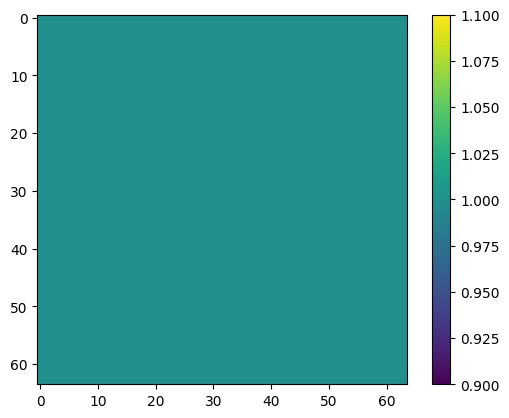

Epoch [3326/10000], Loss: 9.99591343031625e-09
Epoch [3326/10000], Loss: 9.99591343031625e-09
Epoch [3312/10000], Loss: 9.988308846686778e-09
Epoch [3312/10000], Loss: 9.988308846686778e-09
Epoch [3321/10000], Loss: 9.999818750827671e-09
Epoch [3321/10000], Loss: 9.999818750827671e-09
Epoch [3333/10000], Loss: 9.990898774958623e-09
Epoch [3333/10000], Loss: 9.990898774958623e-09
Epoch [3318/10000], Loss: 9.999135741622922e-09
Epoch [3318/10000], Loss: 9.999135741622922e-09
Epoch [3323/10000], Loss: 9.992394467417398e-09
Epoch [3323/10000], Loss: 9.992394467417398e-09
Epoch [3323/10000], Loss: 9.989432392387698e-09
Epoch [3323/10000], Loss: 9.989432392387698e-09
Epoch [3327/10000], Loss: 9.989816973643428e-09
Epoch [3327/10000], Loss: 9.989816973643428e-09
Epoch [3324/10000], Loss: 9.999117978054528e-09
Epoch [3324/10000], Loss: 9.999117978054528e-09
Epoch [3325/10000], Loss: 9.987973115244131e-09
Epoch [3325/10000], Loss: 9.987973115244131e-09
Epoch [3327/10000], Loss: 9.99819871339013

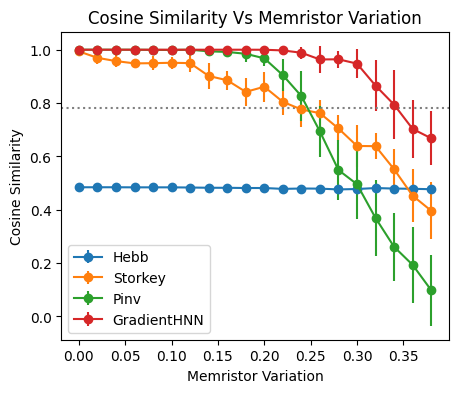

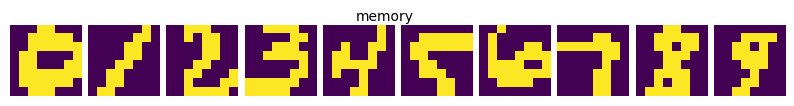

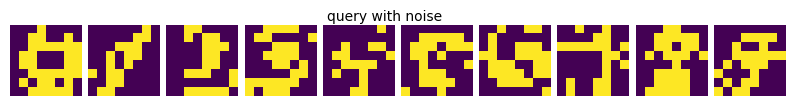

<Figure size 640x480 with 0 Axes>

In [9]:
device='cuda'
input_size=stored_data.shape[1]
learn_lr=1e-3
learn_iters=10000
distance_type='cos'
params={
    'input_size':input_size,
    'learn_lr':learn_lr,
    'learn_iters':learn_iters,
    'device':device,
    'recall_iters':100,
    'data_type':'binary',
    'mid_state':False,
}

#plot settings
plot_weight_flag=True

#memristor variation and stuck at fault
num_simulations=20
mem_var_list=np.arange(0,0.40,0.02)
stuck_at_fault_rate=0.0

mem_stuck_mask=torch.ones(input_size,input_size)
# mem_stuck_mask=generate_mask(1,49,stuck_at_fault_rate)
plt.imshow(mem_stuck_mask)
plt.colorbar()
plt.show()


Hebb = HopfieldNet(num_neurons=input_size)
Storkey = HopfieldNet(num_neurons=input_size)
Pinv=HopfieldNet(num_neurons=input_size)
Equilibrium=HopfieldNet(num_neurons=input_size)



# train the network
Hebb.learn_patterns(stored_data, rule='Hebb',options={})
Storkey.learn_patterns(stored_data, rule='Storkey',options={})     
Pinv.learn_patterns(stored_data, rule='Pinv',options={})


#corrupt the data
params['recall_iters']=100
test_data=np.array([get_corrupted_input(d,0.1) for d in stored_data])
test_data=test_data.reshape(-1,input_size)
test_data = torch.from_numpy(test_data).float()


Hebb_similarity_list=[]
Storkey_similarity_list=[]
Pinv_similarity_list=[]
HNN_similarity_list=[]

num_var=0


for _ in range(num_simulations):
    learn_iters=10000
    for mem_var in mem_var_list:


        # learn_iters+=20
        # create the network
        hnn=SingleLayerHNN_lambda(input_size=input_size)
        optimizer_hnn = torch.optim.RMSprop(hnn.parameters(), lr=learn_lr)
        hnn.set_mask(mask=mem_stuck_mask)
        hnn.noise_level=mem_var*num_var
        hnn_losses=train_multilayer_batch(hnn, optimizer_hnn, stored_data, learn_iters, device)

        hnn.add_variation(var=mem_var)
        Hebb.add_weight_variation(variation=mem_var)
        Storkey.add_weight_variation(variation=mem_var)
        Pinv.add_weight_variation(variation=mem_var)

        Hebb.add_mask(mask=mem_stuck_mask)
        Storkey.add_mask(mask=mem_stuck_mask)
        Pinv.add_mask(mask=mem_stuck_mask)

        # recall data
        HNN_recall = singlelayer_recall(hnn, test_data, params)
        Hebb_recall=Hebb.retrieve_pattern(test_data, sync=True,chnn=False)
        Storkey_recall=Storkey.retrieve_pattern(test_data, sync=True,chnn=False)
        Pinv_recall=Pinv.retrieve_pattern(test_data, sync=True,chnn=False)

        # calculate similarity
        Hebb_similarity=torch.mean(calculate_sim(stored_data,Hebb_recall,distance_type=distance_type))
        Storkey_similarity=torch.mean(calculate_sim(stored_data,Storkey_recall,distance_type=distance_type))
        Pinv_similarity=torch.mean(calculate_sim(stored_data,Pinv_recall,distance_type=distance_type))
        HNN_similarity=torch.mean(calculate_sim(stored_data,HNN_recall,distance_type=distance_type))



        Hebb_similarity_list.append(to_np(Hebb_similarity))
        Storkey_similarity_list.append(to_np(Storkey_similarity))
        Pinv_similarity_list.append(to_np(Pinv_similarity))
        HNN_similarity_list.append(to_np(HNN_similarity))


input_similarities=torch.mean(calculate_sim(stored_data,test_data,distance_type=distance_type))
Hebb_similarity_list=np.array(Hebb_similarity_list).reshape(num_simulations,-1)
Storkey_similarity_list=np.array(Storkey_similarity_list).reshape(num_simulations,-1)
Pinv_similarity_list=np.array(Pinv_similarity_list).reshape(num_simulations,-1)
HNN_similarity_list=np.array(HNN_similarity_list).reshape(num_simulations,-1)

np.savez(num_path+f'/AssociateMemory_variation_{num_var}.npz',mem_var_list=mem_var_list,Hebb_similarity_list=Hebb_similarity_list,Storkey_similarity_list=Storkey_similarity_list,Pinv_similarity_list=Pinv_similarity_list,HNN_similarity_list=HNN_similarity_list,input_similarities=input_similarities)

plt.figure(figsize=(5,4))
plt.errorbar(mem_var_list,np.mean(Hebb_similarity_list,axis=0),yerr=np.std(Hebb_similarity_list,axis=0),label='Hebb',marker='o')
plt.errorbar(mem_var_list,np.mean(Storkey_similarity_list,axis=0),yerr=np.std(Storkey_similarity_list,axis=0),label='Storkey',marker='o')
plt.errorbar(mem_var_list,np.mean(Pinv_similarity_list,axis=0),yerr=np.std(Pinv_similarity_list,axis=0),label='Pinv',marker='o')
plt.errorbar(mem_var_list,np.mean(HNN_similarity_list,axis=0),yerr=np.std(HNN_similarity_list,axis=0),label='GradientHNN',marker='o')

plt.axhline(y=input_similarities,ls=":",c="gray")
plt.title('Cosine Similarity Vs Memristor Variation')
plt.xlabel('Memristor Variation')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.show()


# plot setting
params['plot_num_per_row'] = 12
params['data_set'] = 'mnist'
params['repeat'] = 10
params['plot_num_per_row'] = 10
params['recall_iters']=100
params['mid_state']=False

plot_memory(stored_data, 1, fig_path, params)
plot_memory_noise(test_data, 1, fig_path, params)